In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Read dataframe adding labels.

In [222]:
header = np.append(["Bag Class", "Bag ID"],['f'+str(i) for i in range(1, 167)])
df = pd.read_csv("Musk1.csv", header=None, names=header)

In [223]:
df.head()

,Bag Class,Bag ID,f1,f2,f3,f4,f5,f6,f7,f8,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


# split features and classes

In [230]:
target = df.iloc[:, 0:2]
features = df.iloc[:, 2:]

In [231]:
# scaling data to mu=0 and std=1 with normal assumption

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(features)
scaled_data = scaler.transform(features)

C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\burak.onar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [240]:
pca = PCA(n_components=3)

In [241]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [242]:
x_pca = pca.transform(scaled_data)

In [243]:
print(pca.explained_variance_ratio_)  

[0.31188125 0.13921923 0.07618026]


## plots of 3 components 3D

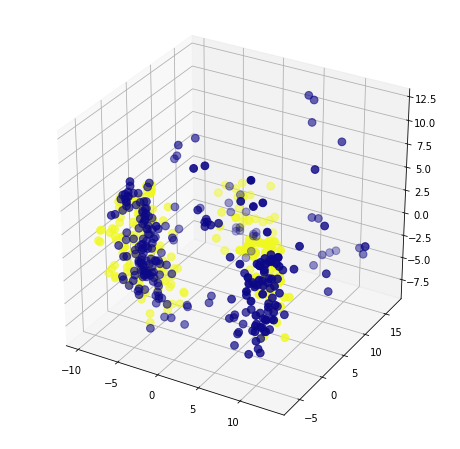

In [260]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2], c=target["Bag Class"], cmap="plasma", s=60)


## plots of 3 components with eachother

<Figure size 576x432 with 0 Axes>

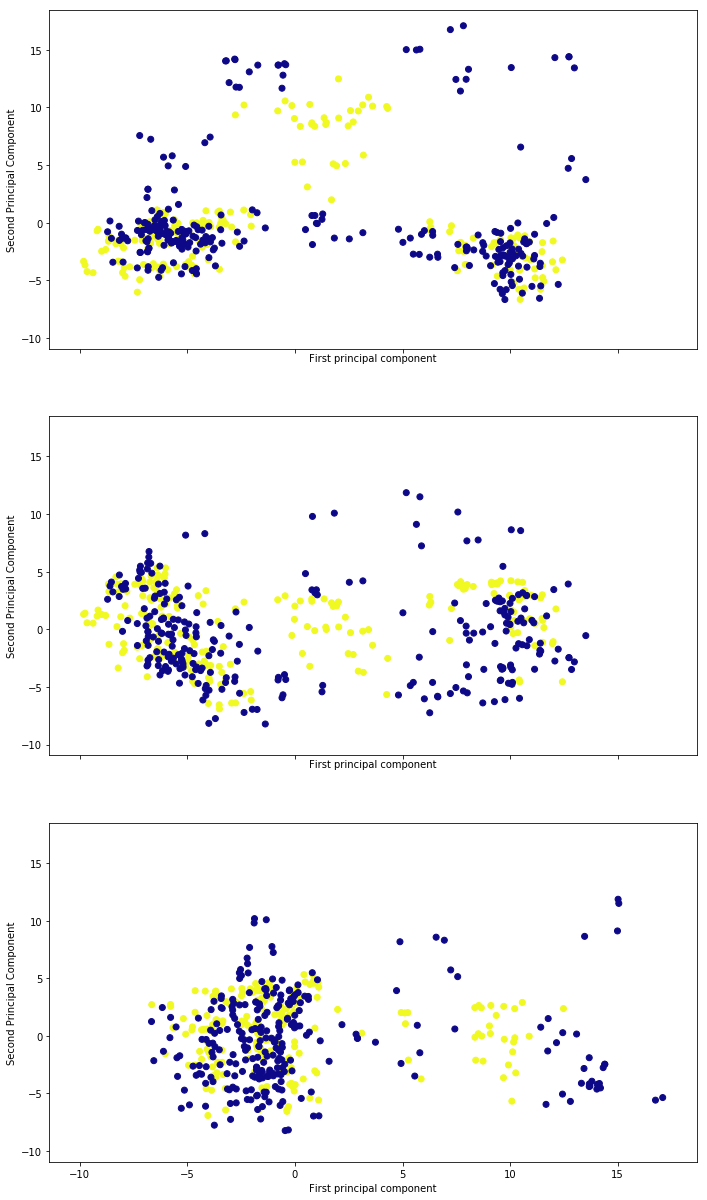

In [258]:
fig = plt.figure(figsize=(8,6))
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex=True, sharey = True)

axes[0].scatter(x_pca[:,0],x_pca[:,1],c=target["Bag Class"],cmap='plasma')
axes[0].set_xlabel('First principal component')
axes[0].set_ylabel('Second Principal Component')


axes[1].scatter(x_pca[:,0],x_pca[:,2],c=target["Bag Class"],cmap='plasma')
axes[1].set_xlabel('First principal component')
axes[1].set_ylabel('Second Principal Component')


axes[2].scatter(x_pca[:,1],x_pca[:,2],c=target["Bag Class"],cmap='plasma')
axes[2].set_xlabel('First principal component')
axes[2].set_ylabel('Second Principal Component')


plt.subplots_adjust(hspace=0.2, top=4, bottom=0, left=0, right=1.5)

In [262]:
from sklearn.manifold import MDS

In [264]:
embedding = MDS(n_components=2)
x_transformed = embedding.fit_transform(features)
x_transformed.shape

(476, 2)

Text(0, 0.5, 'Second MDS Component')

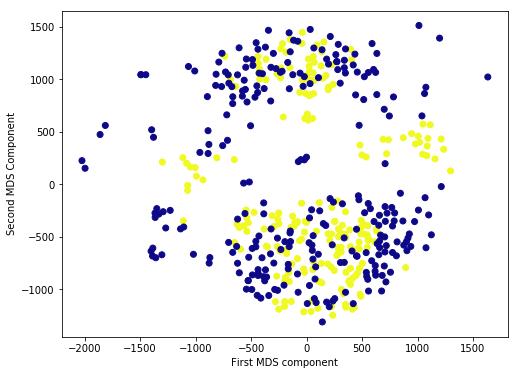

In [266]:
plt.figure(figsize=(8,6))
plt.scatter(x_transformed[:,0],x_transformed[:,1],c=target["Bag Class"],cmap='plasma')
plt.xlabel('First MDS component')
plt.ylabel('Second MDS Component')